In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import gzip

In [2]:
#import data
file_path = './airbnb_dataset/Airbnb_Data.tar.gz'
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    df = pd.read_csv(f,low_memory=False)
pd.set_option('display.max_columns', None)

## Data Preprocessing

In [3]:
df.tail()

,14fc7c55076590dad3ef272ad3efff7c.csv,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
74107,13281809.0,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4.0,2.0,Real Bed,moderate,True,LA,"Located on the Pacific Coast Highway, this apa...",2016-08-15,t,f,100%,2016-05-03,f,2017-04-15,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16.0,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039.0,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5.0,1.0,Real Bed,moderate,True,NYC,A modern apartment located in East Williamsbur...,2015-01-03,t,t,100%,2012-01-05,t,2017-09-10,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43.0,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948.0,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2.0,1.0,Real Bed,strict,True,NYC,"Fully renovated, designer's studio located in ...",NaN,t,f,100%,2017-09-17,t,NaN,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0.0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0
74110,3534845.0,4.852030,Boat,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",4.0,1.0,Real Bed,moderate,False,LA,You will stay-aboard the Island Trader at one ...,2013-09-05,t,t,100%,2012-11-26,f,2017-04-30,33.761096,-118.192409,Cozy Boat at Shoreline Village,Long Beach,205.0,96.0,https://a0.muscache.com/im/pictures/22968537/d...,90802,1.0,2.0
74111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[:-1]

In [5]:
df.dtypes

14fc7c55076590dad3ef272ad3efff7c.csv    float64
log_price                               float64
property_type                            object
room_type                                object
amenities                                object
accommodates                            float64
bathrooms                               float64
bed_type                                 object
cancellation_policy                      object
cleaning_fee                             object
city                                     object
description                              object
first_review                             object
host_has_profile_pic                     object
host_identity_verified                   object
host_response_rate                       object
host_since                               object
instant_bookable                         object
last_review                              object
latitude                                float64
longitude                               

In [6]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

bathrooms                   200
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
last_review               15827
neighbourhood              6872
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [7]:
df['14fc7c55076590dad3ef272ad3efff7c.csv'] = pd.to_numeric(df['14fc7c55076590dad3ef272ad3efff7c.csv'], errors='coerce', downcast='integer')
df.rename(columns={'14fc7c55076590dad3ef272ad3efff7c.csv': 'id'}, inplace=True)

In [8]:
unique_values_counts = {col: df[col].nunique() for col in df.columns}
unique_values_counts

{'id': 74111,
 'log_price': 767,
 'property_type': 35,
 'room_type': 3,
 'amenities': 67122,
 'accommodates': 16,
 'bathrooms': 17,
 'bed_type': 5,
 'cancellation_policy': 5,
 'cleaning_fee': 2,
 'city': 6,
 'description': 73479,
 'first_review': 2554,
 'host_has_profile_pic': 2,
 'host_identity_verified': 2,
 'host_response_rate': 80,
 'host_since': 3087,
 'instant_bookable': 2,
 'last_review': 1371,
 'latitude': 74111,
 'longitude': 74111,
 'name': 73359,
 'neighbourhood': 619,
 'number_of_reviews': 371,
 'review_scores_rating': 54,
 'thumbnail_url': 65883,
 'zipcode': 769,
 'bedrooms': 11,
 'beds': 18}

In [9]:
df_encoded = pd.get_dummies(df, columns=['cleaning_fee','host_has_profile_pic', 'host_identity_verified',
     'instant_bookable'
     ], drop_first=True)

In [10]:
from sklearn.model_selection import KFold

# Parameters
n_splits = 5  # Number of splits for the K-Folds cross-validator
categorical_columns = [
    'property_type', 'room_type', 'bed_type', 
    'cancellation_policy', 'city'
]

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create new columns for the encoded features, initialized with NaNs
for column in categorical_columns:
    df_encoded[f'{column}_encoded'] = np.nan

# Apply K-Fold target encoding
for train_index, val_index in kf.split(df_encoded):
    for column in categorical_columns:
        fold_train, fold_val = df_encoded.iloc[train_index], df_encoded.iloc[val_index]
        means = fold_train.groupby(column)['log_price'].mean()
        df_encoded.loc[df_encoded.index[val_index], f'{column}_encoded'] = fold_val[column].map(means)

for column in categorical_columns:
    df_encoded[f'{column}_encoded'].fillna(df_encoded['log_price'].mean(), inplace=True)

# Drop the original categorical columns
df_encoded.drop(categorical_columns, axis=1, inplace=True)

In [11]:
df_encoded.head()

,id,log_price,amenities,accommodates,bathrooms,description,first_review,host_response_rate,host_since,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,cleaning_fee_True,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t,property_type_encoded,room_type_encoded,bed_type_encoded,cancellation_policy_encoded,city_encoded
0,6901257,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3.0,1.0,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,NaN,2012-03-26,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2.0,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,1,1,1,0,4.760967,5.168581,4.796982,4.888112,4.721761
1,6304928,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7.0,1.0,Enjoy travelling during your stay in Manhattan...,2017-08-05,100%,2017-06-19,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6.0,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,1,1,0,1,4.758486,5.170322,4.794964,4.888348,4.720492
2,7919400,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5.0,1.0,The Oasis comes complete with a full backyard ...,2017-04-30,100%,2016-10-25,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10.0,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,1,1,1,1,4.758085,5.164081,4.791209,4.719628,4.717605
3,13418779,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4.0,1.0,This light-filled home-away-from-home is super...,NaN,NaN,2015-04-19,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0.0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,1,1,1,0,4.799825,5.170322,4.794964,4.681690,5.172931
4,3808709,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2.0,1.0,"Cool, cozy, and comfortable studio located in ...",2015-05-12,100%,2015-03-01,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4.0,40.0,NaN,20009,0.0,1.0,1,1,1,1,4.758986,5.166411,4.792550,4.716900,4.982195


In [12]:
missing_values = df_encoded.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

bathrooms                 200
first_review            15864
host_response_rate      18299
host_since                188
last_review             15827
neighbourhood            6872
review_scores_rating    16722
thumbnail_url            8216
zipcode                   966
bedrooms                   91
beds                      131
dtype: int64

We remove the column with an excessively large number of categories

Also remove the observation that containing a small number of missing values.

In [13]:
df_encoded.drop(['thumbnail_url', 'zipcode','neighbourhood','first_review', 'last_review'], axis=1, inplace=True)
df_encoded.dropna(subset=['host_since'], inplace=True)

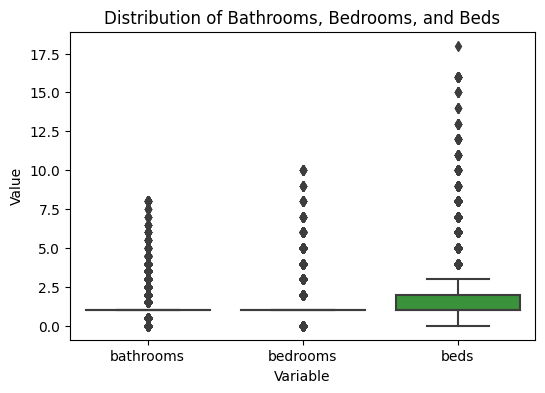

In [14]:
df_melted = df.melt(value_vars=['bathrooms', 'bedrooms', 'beds'], var_name='Variable', value_name='Value')

# Drawing the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Variable', y='Value', data=df_melted)
plt.title('Distribution of Bathrooms, Bedrooms, and Beds')
plt.show()

The boxplot reveals the presence of outliers, makes the median a more reliable measure than the mean for imputing missing values.

Then filling missing values in each column with the median of that column grouped by the 'accommodates' category.

In [15]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df_encoded[col] = df.groupby('accommodates')[col].transform(lambda x: x.fillna(x.median()))

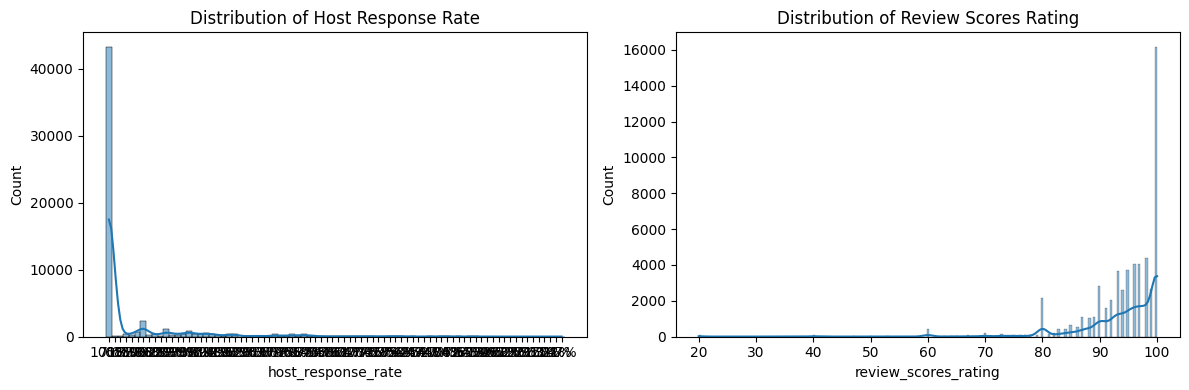

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_encoded['host_response_rate'], kde=True)
plt.title('Distribution of Host Response Rate')

plt.subplot(1, 2, 2)
sns.histplot(df_encoded['review_scores_rating'], kde=True)
plt.title('Distribution of Review Scores Rating')

plt.tight_layout()
plt.show()

In [17]:
# Impute missing val with the median
df_encoded['host_response_rate'] = df_encoded['host_response_rate'].str.rstrip('%').astype(float)
df_encoded['host_response_rate'].fillna(df_encoded['host_response_rate'].median(), inplace=True)
df_encoded['review_scores_rating'].fillna(df_encoded['review_scores_rating'].median(), inplace=True)

In [18]:
missing_values = df_encoded.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

## Data Visulization

### Histogram

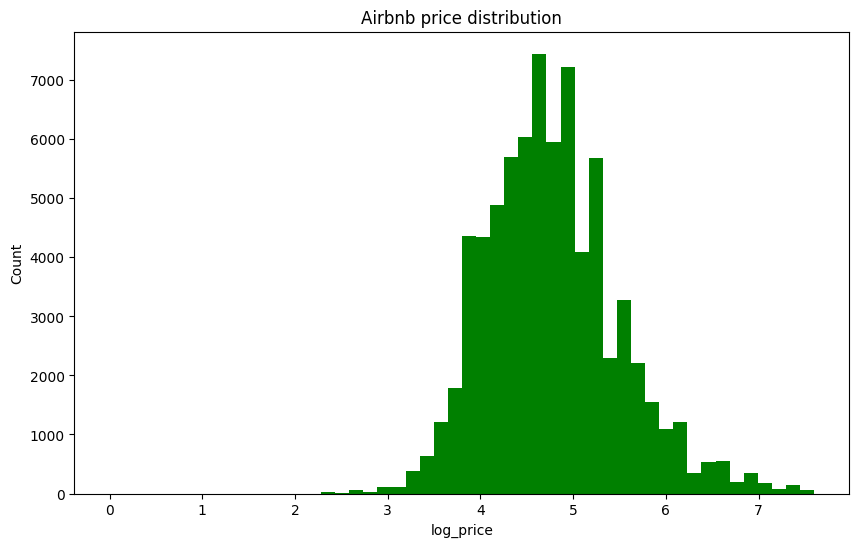

In [19]:
# Plot the distribution of the Airbnb log prices
plt.figure(figsize=(10, 6))
plt.hist(df['log_price'], bins=50, color='green')
plt.title('Airbnb price distribution')
plt.xlabel('log_price')
plt.ylabel('Count')
plt.show()

### Correlation matrix

In [20]:
# Select a subset of the dataframe for the Correlation matrix
numeric_features = ['log_price', 'accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']
subset_df = df[numeric_features].dropna()
# Correlation matrix
corr_matrix = subset_df.corr()

### Heatmap

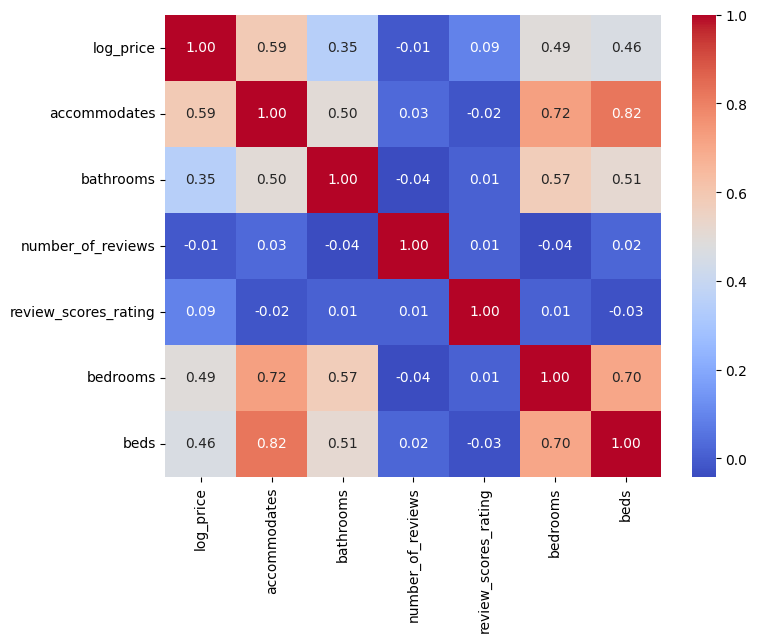

In [21]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Pairplot graph

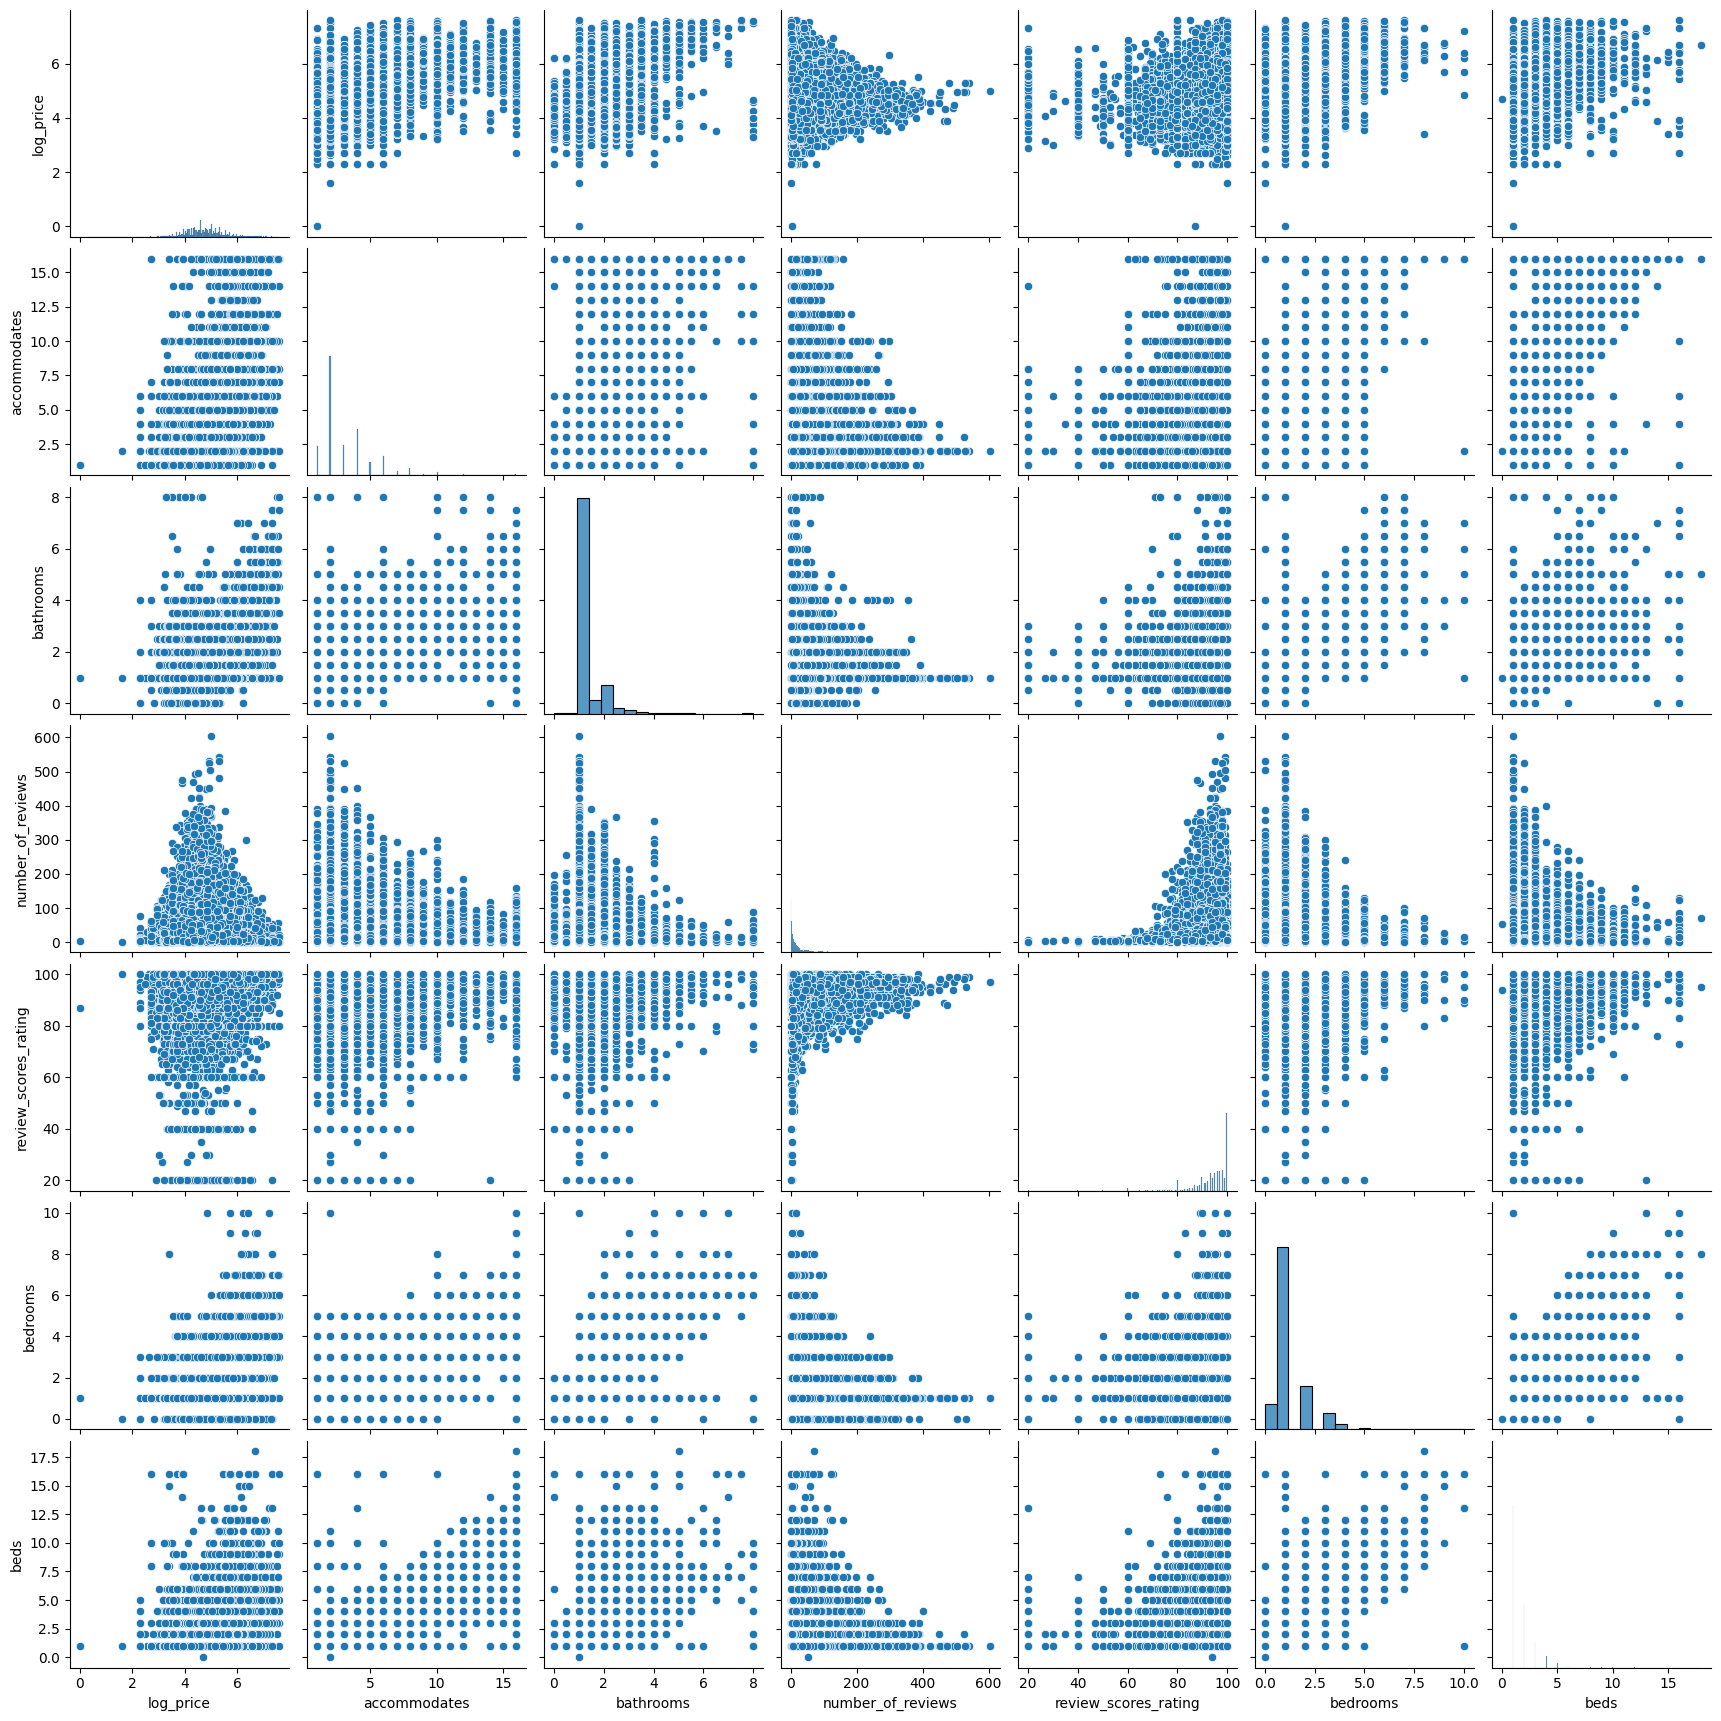

In [22]:
sns.pairplot(subset_df)

### Skewness

In [23]:
skew_matrix = pd.DataFrame(columns=subset_df.columns)
for column in subset_df.columns:
    skew_matrix.loc["Skewness", column] = subset_df[column].skew()
    
print(skew_matrix)

         log_price accommodates bathrooms number_of_reviews  \
Skewness  0.370813     2.184333  3.620546          3.340176   

         review_scores_rating  bedrooms      beds  
Skewness            -3.381592  1.892448  3.184854  


### Nine Graphs

#### room type

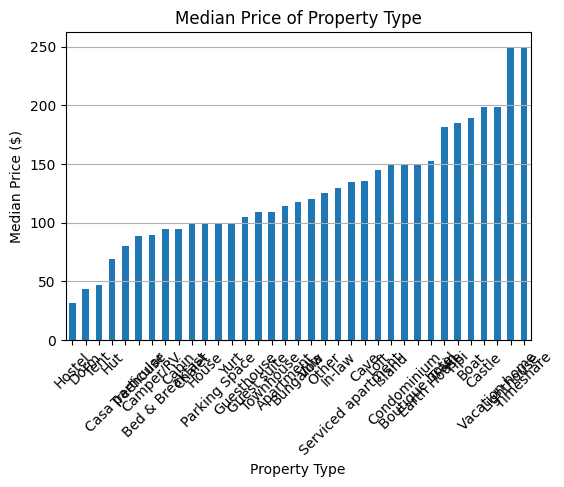

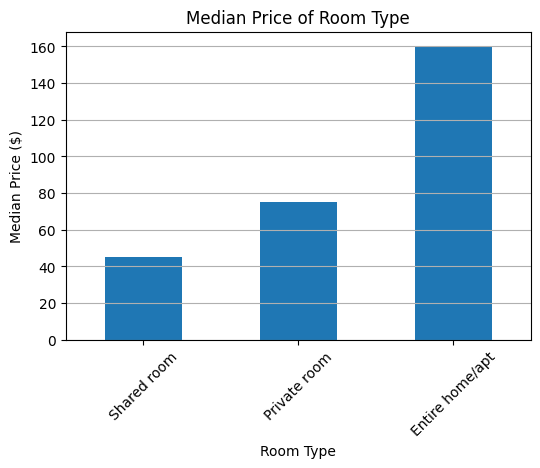

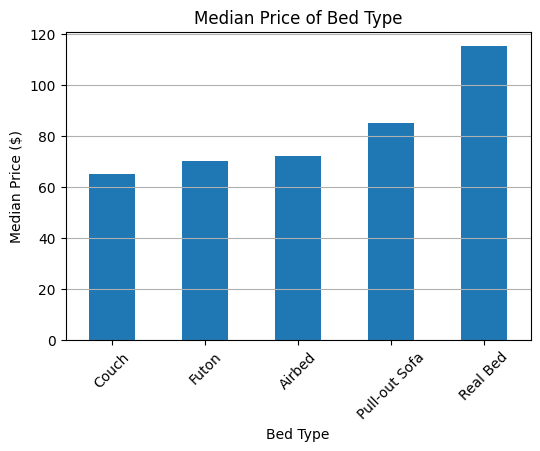

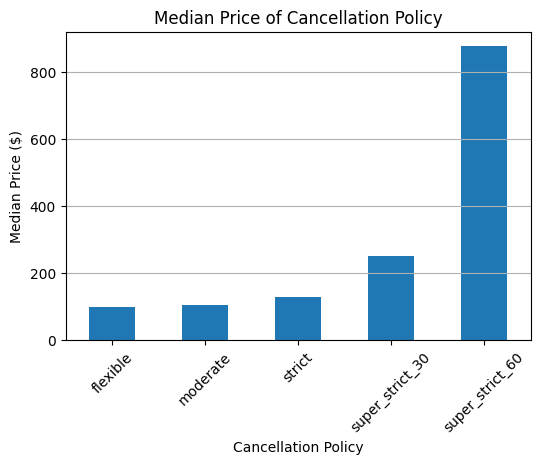

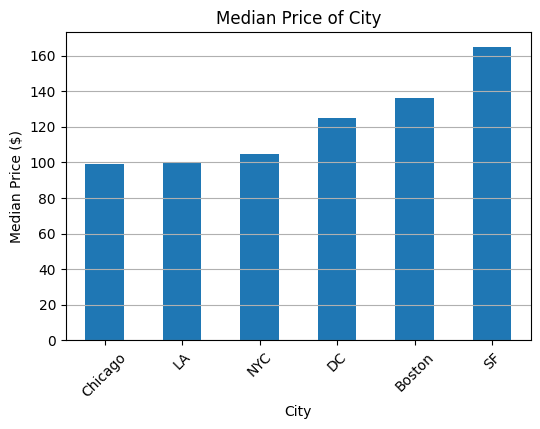

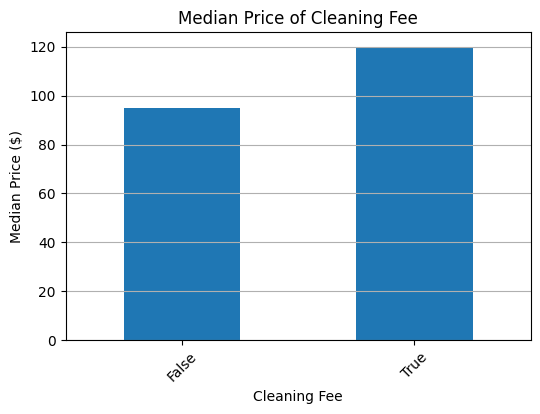

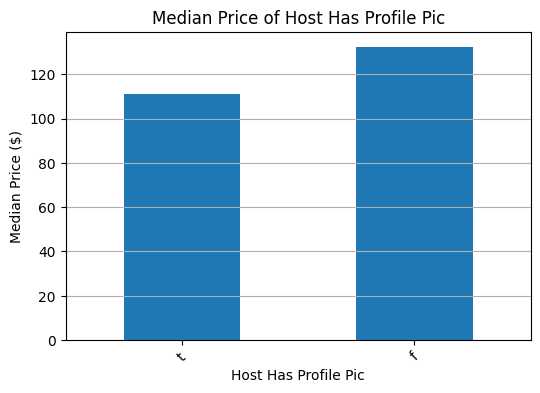

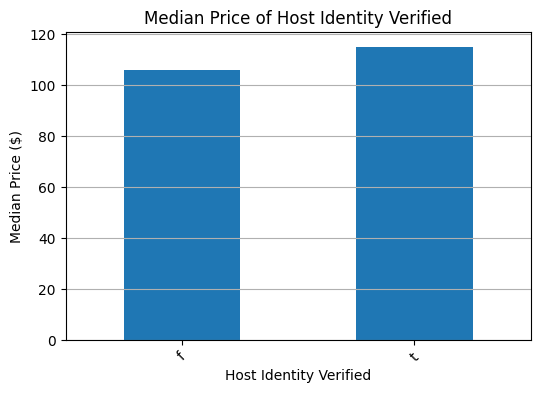

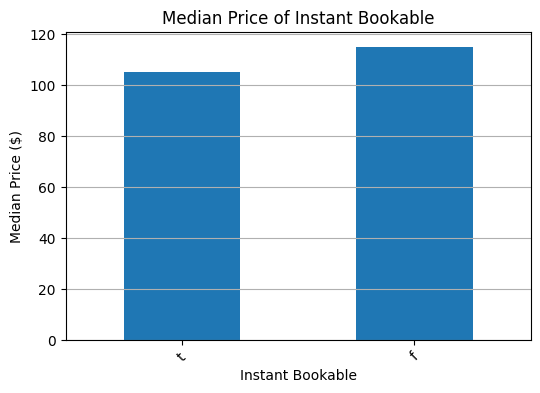

In [24]:
# List of columns to plot
columns_to_plot = [
    'property_type', 'room_type', 'bed_type', 'cancellation_policy',
    'city', 'cleaning_fee', 'host_has_profile_pic', 'host_identity_verified',
    'instant_bookable'
]

def plot_median_price_for_column(column_name, df):
    median_price = df.groupby(column_name)['log_price'].median().sort_values()
    median_price_exp = np.exp(median_price)

    plt.figure(figsize=(6, 4))
    median_price_exp.plot(kind='bar')
    plt.title(f'Median Price of {column_name.replace("_", " ").title()}')
    plt.xlabel(column_name.replace("_", " ").title())
    plt.ylabel('Median Price ($)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

for column in columns_to_plot:
    plot_median_price_for_column(column, df)


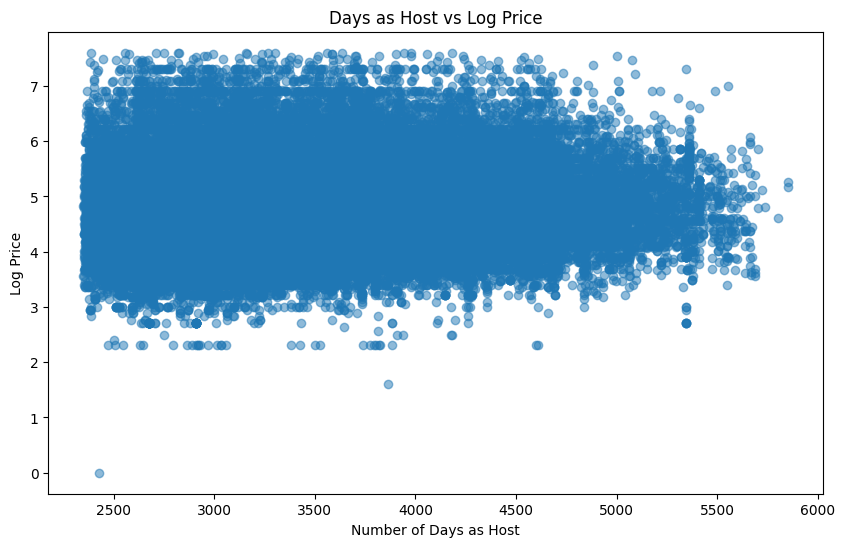

Correlation coefficient: 0.07833307798072495


In [25]:
from datetime import datetime

# Convert 'host_since' to datetime
df_encoded['host_since'] = pd.to_datetime(df_encoded['host_since'])

# Calculate the number of days from 'host_since' to a reference date (e.g., current date)
df_encoded['days_as_host'] = (datetime.now() - df_encoded['host_since']).dt.days

# Plot 'days_as_host' vs 'log_price'
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['days_as_host'], df_encoded['log_price'], alpha=0.5)
plt.title('Days as Host vs Log Price')
plt.xlabel('Number of Days as Host')
plt.ylabel('Log Price')
plt.show()

# Calculate the correlation coefficient
correlation = df_encoded['days_as_host'].corr(df_encoded['log_price'])
print(f"Correlation coefficient: {correlation}")

In [26]:
df_encoded.drop(['days_as_host','host_since','number_of_reviews', 'review_scores_rating','latitude','longitude','amenities','instant_bookable_t','host_identity_verified_t'], axis=1, inplace=True)
df_encoded.shape

(73923, 16)

## Sentiments analysis

In [27]:
# Load sentiment_dict from a created file
sentiment_dict = {}
with open('airbnb_dataset/tfidf_dict.txt', 'r') as f:
    for line in f:
        word, theta = line.split()
        sentiment_dict[word] = float(theta)
name_dict = {}
with open('airbnb_dataset/name_dict.txt', 'r') as f:
    for line in f:
        word, theta = line.split()
        name_dict[word] = float(theta)

In [28]:
punctuation = set(string.punctuation)

def sentiment(d):
    sentimentScore = 0
    r = ''.join([c for c in d.lower() if not c in punctuation])
    for w in r.split():
        sentimentScore += sentiment_dict.get(w, 0)
    return sentimentScore
def name(d):
    sentimentScore = 0
    r = ''.join([c for c in d.lower() if not c in punctuation])
    for w in r.split():
        sentimentScore += name_dict.get(w, 0)
    return sentimentScore

In [29]:
# Calculate each description's sentiment score
def des_sentiment(row):
    # This function will be applied to each row in the DataFrame
    if pd.notnull(row['description']):
        return sentiment(row['description'])
    else:
        return 0

def name_sentiment(row):
    if pd.notnull(row['description']):
        return name(row['description'])
    else:
        return 0
    
# Apply the function to each row
df_encoded['des_sentiment_analysis'] = df_encoded.apply(des_sentiment, axis=1)
df_encoded['name_sentiment_analysis'] = df_encoded.apply(name_sentiment, axis=1)


## Normalization

In [31]:
# Min-Max Nomarlization
cols_to_normalize = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'des_sentiment_analysis','host_response_rate',
    'property_type_encoded','room_type_encoded','bed_type_encoded','cancellation_policy_encoded','city_encoded',
    'cleaning_fee_True','host_has_profile_pic_t'
]


df_encoded[cols_to_normalize] = (df_encoded[cols_to_normalize] - df_encoded[cols_to_normalize].min()) / (df_encoded[cols_to_normalize].max() - df_encoded[cols_to_normalize].min())


df_encoded.shape, df_encoded[cols_to_normalize].head()

((73923, 18),
    accommodates  bathrooms  bedrooms      beds  des_sentiment_analysis  \
 0      0.133333      0.125       0.1  0.055556                0.546844   
 1      0.400000      0.125       0.3  0.166667                0.602953   
 2      0.266667      0.125       0.1  0.166667                0.600378   
 3      0.200000      0.125       0.2  0.111111                0.546608   
 4      0.066667      0.125       0.0  0.055556                0.518090   
 
    host_response_rate  property_type_encoded  room_type_encoded  \
 0                 1.0               0.572876           0.998679   
 1                 1.0               0.571692           1.000000   
 2                 1.0               0.571500           0.995266   
 3                 1.0               0.591425           1.000000   
 4                 1.0               0.571930           0.997033   
 
    bed_type_encoded  cancellation_policy_encoded  city_encoded  \
 0          1.000000                     0.110344      0.

In [32]:
# Standardlization 
from sklearn.preprocessing import StandardScaler

columns_to_standardize = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'des_sentiment_analysis','host_response_rate',
    'property_type_encoded','room_type_encoded','bed_type_encoded','cancellation_policy_encoded','city_encoded',
    'host_has_profile_pic_t','cleaning_fee_True']


scaler = StandardScaler()
df_encoded[columns_to_standardize] = scaler.fit_transform(df_encoded[columns_to_standardize])
df_encoded.shape, df_encoded[columns_to_standardize].head()

((73923, 18),
    accommodates  bathrooms  bedrooms      beds  des_sentiment_analysis  \
 0     -0.072621  -0.404046 -0.312048 -0.566461                0.216242   
 1      1.783653  -0.404046  2.034955  1.027816                0.837002   
 2      0.855516  -0.404046 -0.312048  1.027816                0.808508   
 3      0.391448  -0.404046  0.861454  0.230678                0.213627   
 4     -0.536689  -0.404046 -1.485549 -0.566461               -0.101872   
 
    host_response_rate  property_type_encoded  room_type_encoded  \
 0            0.296013              -0.221989           0.879947   
 1            0.296013              -0.248121           0.883912   
 2            0.296013              -0.252342           0.869698   
 3            0.296013               0.187295           0.883912   
 4            0.296013              -0.242856           0.875005   
 
    bed_type_encoded  cancellation_policy_encoded  city_encoded  \
 0          0.206922                     1.031946     -0.

In [33]:
df_encoded.drop(['description','id', 'name'], axis=1, inplace=True)

In [34]:
print("Min:", np.min(df_encoded['log_price']))
print("Max:", np.max(df_encoded['log_price']))

Min: 0.0
Max: 7.6004023345004


In [35]:
df_encoded = df_encoded[df_encoded['log_price'] != 0.0]


In [36]:
df_encoded.head()

,log_price,accommodates,bathrooms,host_response_rate,bedrooms,beds,cleaning_fee_True,host_has_profile_pic_t,property_type_encoded,room_type_encoded,bed_type_encoded,cancellation_policy_encoded,city_encoded,des_sentiment_analysis,name_sentiment_analysis
0,5.010635,-0.072621,-0.404046,0.296013,-0.312048,-0.566461,0.601901,0.055377,-0.221989,0.879947,0.206922,1.031946,-0.417068,0.216242,-0.435248
1,5.129899,1.783653,-0.404046,0.296013,2.034955,1.027816,0.601901,0.055377,-0.248121,0.883912,0.178912,1.034251,-0.425829,0.837002,-1.788095
2,4.976734,0.855516,-0.404046,0.296013,-0.312048,1.027816,0.601901,0.055377,-0.252342,0.869698,0.126796,-0.607644,-0.445747,0.808508,-0.133695
3,6.620073,0.391448,-0.404046,0.296013,0.861454,0.230678,0.601901,0.055377,0.187295,0.883912,0.178912,-0.976832,2.696289,0.213627,-0.926212
4,4.744932,-0.536689,-0.404046,0.296013,-1.485549,-0.566461,0.601901,0.055377,-0.242856,0.875005,0.145414,-0.634193,1.380088,-0.101872,-0.095776


In [37]:
csv_file_path = './airbnb_dataset/data.csv'
df_encoded.to_csv(csv_file_path, index=False)